In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr

In [290]:
@jit(nogil=True)
def pr_cor_corr(x, y):
    co = np.count_nonzero(~np.isnan(x))
    if co < len(y): 
        print('This line')
        return np.nan, np.nan   
    
    corr, _ = pearsonr(x, y)
    return corr

@jit(nogil=True)
def pr_cor_pval(x, y):
    co = np.count_nonzero(~np.isnan(x))
    if co < len(y): 
        return np.nan
    _, p_value = pearsonr(x, y)
    return p_value   

# Function for Pearson Test per pixel
def pearsonr_corr(x, y, func=pr_cor_corr, dim='time'):
    return xr.apply_ufunc(
        func, x , y,
        input_core_dims=[[dim], [dim]],        
        vectorize=True,   
        output_dtypes=[float]
    )

In [3]:
nwi = nc.Dataset('C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/nwi_monthly.nc')
nei = nc.Dataset('C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/nei_monthly.nc')
ci = nc.Dataset('C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/ci_monthly.nc')
spi = nc.Dataset('C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/spi_monthly.nc')

In [17]:
nwi

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(1404), y(14), x(16)
    variables(dimensions): int64 time(time), float64 y(y), float64 x(x), int64 spatial_ref(), float32 rf(time,y,x)
    groups: 

In [5]:
nwi_rf    = nwi.variables['rf'][:]
nei_rf    = nei.variables['rf'][:]
ci_rf    = ci.variables['rf'][:]
spi_rf    = spi.variables['rf'][:]


In [18]:
NWI_data = np.reshape(nwi_rf, (12,117,14,16), order='F')
NEI_data = np.reshape(nei_rf, (12,117,8,15), order='F')
CEI_data = np.reshape(ci_rf,  (12,117,11,21), order='F')
SPI_data = np.reshape(spi_rf, (12,117,12,12), order='F')


In [20]:
NWI_data = np.transpose(NWI_data, (1, 0, 2, 3))
NEI_data = np.transpose(NEI_data, (1, 0, 2, 3))
CEI_data = np.transpose(CEI_data, (1, 0, 2, 3))
SPI_data = np.transpose(SPI_data, (1, 0, 2, 3))

In [21]:
NWI_mean = np.mean(NWI_data, axis=0)
NEI_mean = np.mean(NEI_data, axis=0)
CEI_mean = np.mean(CEI_data, axis=0)
SPI_mean = np.mean(SPI_data, axis=0)


In [24]:
temp11 = np.reshape(NWI_data,(117,12,14*16), order='F')
temp12 = np.reshape(NEI_data,(117,12,8*15), order='F')
temp13 = np.reshape(CEI_data,(117,12,11*21), order='F')
temp14 = np.reshape(SPI_data,(117,12,12*12), order='F')

In [25]:
temp21 = np.mean(temp11, axis=2); 
temp22 = np.mean(temp12, axis=2); 
temp23 = np.mean(temp13, axis=2); 
temp24 = np.mean(temp14, axis=2); 

In [26]:
NWI_series = np.reshape(temp21.T,(12*117,1), order='F'); 
NEI_series = np.reshape(temp22.T,(12*117,1), order='F'); 
CEI_series = np.reshape(temp23.T,(12*117,1), order='F'); 
SPI_series = np.reshape(temp24.T,(12*117,1), order='F'); 


In [28]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [29]:
time1 = pd.date_range(start='1/1/1901', end='12/1/2017',freq='MS').to_pydatetime()

In [31]:
time1.size

1404

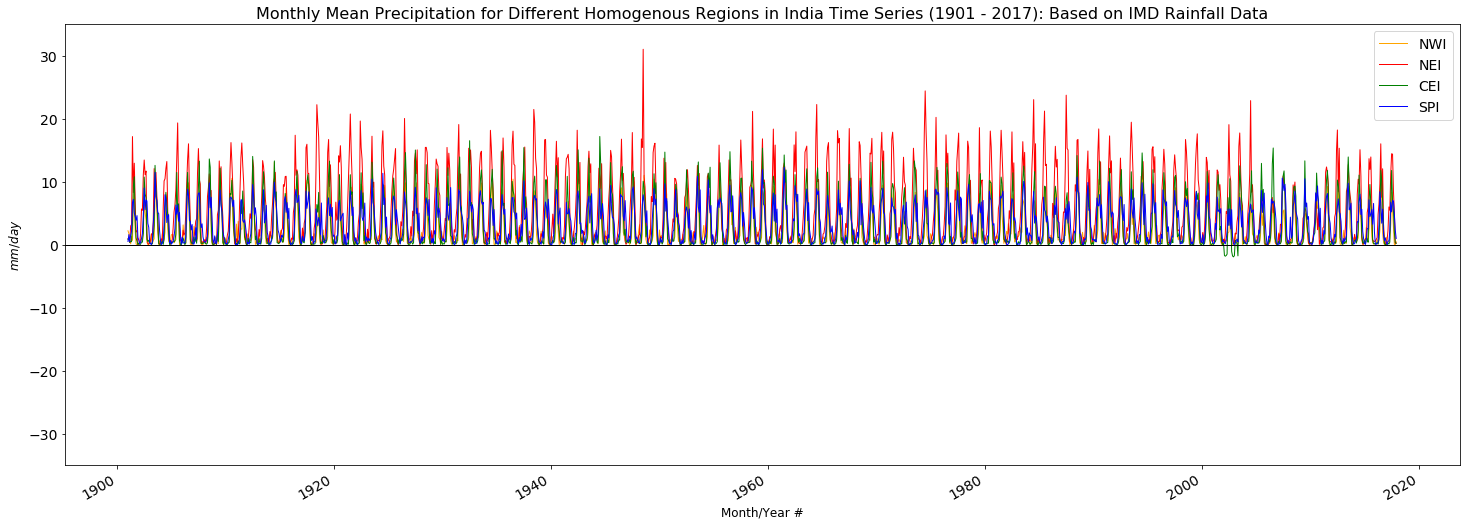

In [212]:
fig, ax = plt.subplots(1, 1 , figsize=(25,10))

ax.plot(time1, NWI_series, color='orange', linewidth=1, label='NWI')
ax.plot(time1, NEI_series,  color='red', linewidth=1, label='NEI')
ax.plot(time1, CEI_series,  color='green', linewidth=1, label='CEI')
ax.plot(time1, SPI_series,  color='blue', linewidth=1, label='SPI')

ax.axhline(0, linewidth=1, color='k')
ax.legend()
ax.set_title('Monthly Mean Precipitation for Different Homogenous Regions in India Time Series (1901 - 2017): Based on IMD Rainfall Data', fontsize=16)
ax.set_xlabel('Month/Year #', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(-35.0, 35.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

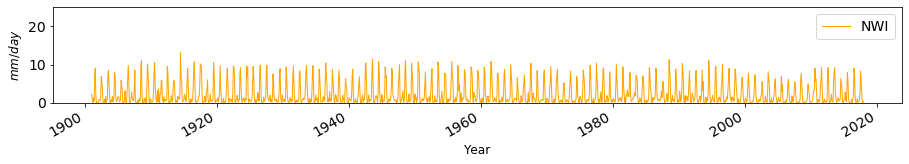

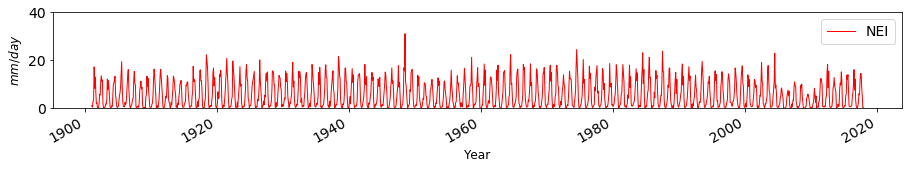

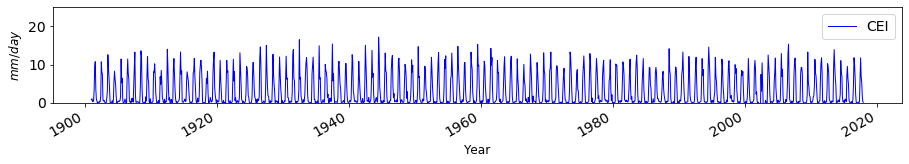

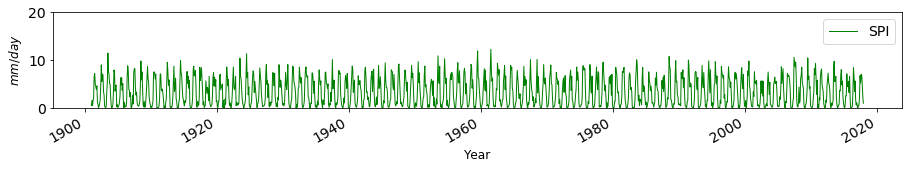

In [240]:
width = 70
height = width/1.666
gs = fig.add_gridspec(4,4)


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[0,0])
ax.plot(time1, NWI_series, color='orange', linewidth=1, label='NWI')
ax.axhline(0, linewidth=1, color='k')
ax.legend()

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(0, 25.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[1,0])
ax.plot(time1, NEI_series, color='red', linewidth=1, label='NEI')
ax.axhline(0, linewidth=1, color='k')
ax.legend()

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(0, 40.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[1,0])
ax.plot(time1, CEI_series, color='blue', linewidth=1, label='CEI')
ax.axhline(0, linewidth=1, color='k')
ax.legend()

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(0, 25.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')


fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(gs[1,0])
ax.plot(time1, SPI_series, color='green', linewidth=1, label='SPI')
ax.axhline(0, linewidth=1, color='k')
ax.legend()

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(0, 20.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

In [37]:
NWI_mean.shape

(12, 14, 16)

In [38]:
num_repeats = 117 # 117 years
NWI_mean = np.vstack([NWI_mean]*num_repeats)
NEI_mean = np.vstack([NEI_mean]*num_repeats)
CEI_mean = np.vstack([CEI_mean]*num_repeats)
SPI_mean = np.vstack([SPI_mean]*num_repeats)
NWI_mean.shape

(1404, 14, 16)

In [39]:
NWI_mean = np.reshape(NWI_mean, (12,117,14,16), order='F')
NEI_mean = np.reshape(NEI_mean, (12,117,8,15), order='F')
CEI_mean = np.reshape(CEI_mean,  (12,117,11,21), order='F')
SPI_mean = np.reshape(SPI_mean, (12,117,12,12), order='F')

In [40]:
NWI_mean = np.transpose(NWI_mean, (1, 0, 2, 3))
NEI_mean = np.transpose(NEI_mean, (1, 0, 2, 3))
CEI_mean = np.transpose(CEI_mean, (1, 0, 2, 3))
SPI_mean = np.transpose(SPI_mean, (1, 0, 2, 3))

In [41]:
NWI_a  = NWI_data-NWI_mean
NEI_a  = NEI_data-NEI_mean
CEI_a  = CEI_data-CEI_mean
SPI_a  = SPI_data-SPI_mean

In [44]:
temp11 = np.reshape(NWI_a,(117,12,14*16), order='F')
temp12 = np.reshape(NEI_a,(117,12,8*15), order='F')
temp13 = np.reshape(CEI_a,(117,12,11*21), order='F')
temp14 = np.reshape(SPI_a,(117,12,12*12), order='F')

In [45]:
temp21 = np.mean(temp11, axis=2); 
temp22 = np.mean(temp12, axis=2); 
temp23 = np.mean(temp13, axis=2); 
temp24 = np.mean(temp14, axis=2); 


In [47]:
NWI_anomaly = np.reshape(temp21.T,(12*117,1), order='F'); 
NEI_anomaly = np.reshape(temp22.T,(12*117,1), order='F'); 
CEI_anomaly = np.reshape(temp23.T,(12*117,1), order='F'); 
SPI_anomaly = np.reshape(temp24.T,(12*117,1), order='F'); 


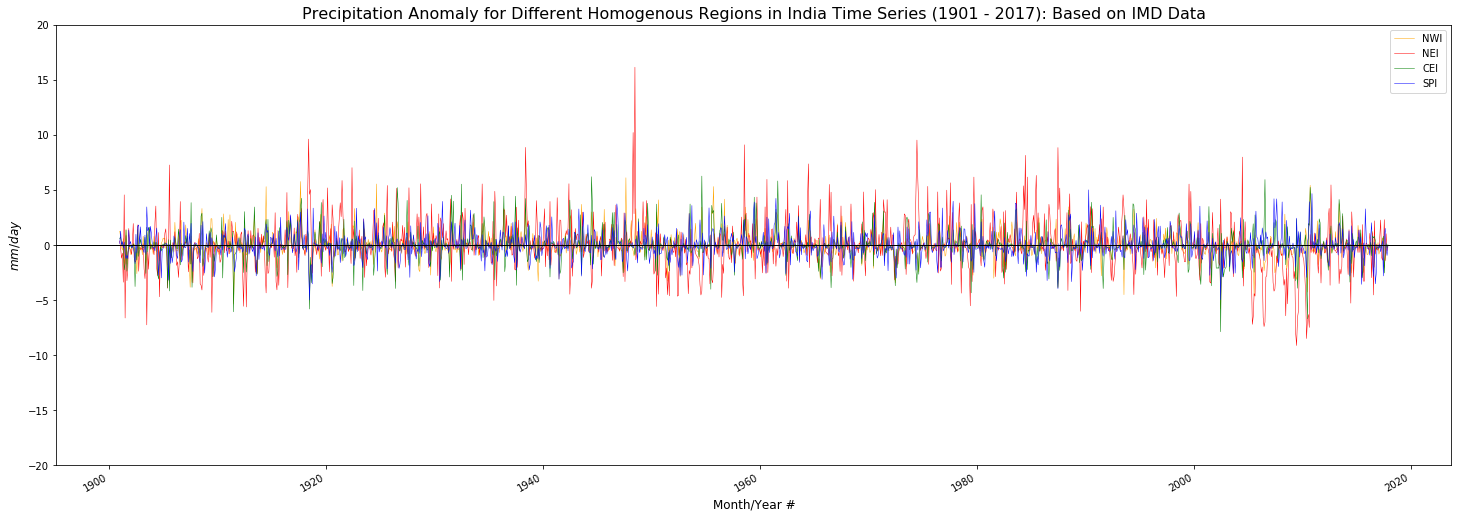

In [54]:
fig, ax = plt.subplots(1, 1 , figsize=(25,10))

ax.plot(time1, NWI_anomaly, color='orange', linewidth=0.5, label='NWI')
ax.plot(time1, NEI_anomaly,  color='red', linewidth=0.5, label='NEI')
ax.plot(time1, CEI_anomaly,  color='green', linewidth=0.5, label='CEI')
ax.plot(time1, SPI_anomaly,  color='blue', linewidth=0.5, label='SPI')

ax.axhline(0, linewidth=1, color='k')
ax.legend()
ax.set_title('Precipitation Anomaly for Different Homogenous Regions in India Time Series (1901 - 2017): Based on IMD Data', fontsize=16)
ax.set_xlabel('Month/Year #', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(-20.0, 20.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

In [53]:
NWI_anomaly

masked_array(
  data=[[1.262647297548699],
        [0.6965490990898056],
        [-0.15245671432097777],
        [-0.4509861822979299],
        [0.6038162236372568],
        [-1.8618533113888984],
        [-1.0959739745571373],
        [1.4087167778242393],
        [-1.7061838726417735],
        [-0.6693376870856691],
        [-0.21919481122304926],
        [-0.26160432892397806],
        [-0.8342781834511638],
        [-0.8160858468281502],
        [-0.07801952610153666],
        [0.08834458018711237],
        [0.10402740060993088],
        [-0.6412902587942367],
        [-0.7901385493188907],
        [-2.596064467972336],
        [0.018365476202927125],
        [-0.391271332496537],
        [-0.19697796712189625],
        [-0.4373171488296055],
        [0.045711173758479016],
        [-0.8857974036199235],
        [0.8103259748488004],
        [-0.4145107432744604],
        [-0.036061598637166556],
        [-1.627949284502855],
        [-0.6888309290487941],
        [0.84031171469784

In [55]:
#Correlating Rainfall Anomalies with Nino 3.4 and DMI Index

In [56]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
from numba import jit
from functools import partial
from scipy.stats import pearsonr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [58]:
import matplotlib
matplotlib.rc('figure', figsize = (10, 5))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = True, right = True)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

In [118]:
import pandas as pd
enso = pd.read_csv("C:/Users/blaze/Documents/iod_data.csv")
filslp = "C:/Users/blaze/Documents/mywork/prmsl.mon.mean.nc"
filnwi = "C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/nwi_monthly.nc"
filnei = "C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/nei_monthly.nc"
filci = "C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/ci_monthly.nc"
filspi = "C:/Users/blaze/Documents/mywork/imd_rainfall_homogenous/imd_monthly_region/spi_monthly.nc"

In [119]:
yrStrt  = 1901       # manually specify for convenience
yrLast  = 2012          # 20th century ends 2018  

clStrt  = 1950          # reference climatology for SOI
clLast  = 1979          

yrStrtP = 1979          # 1st year GPCP
yrLastP = yrLast        # match 20th century

In [120]:
latT = -17.6         # Tahiti
lonT = 210.75  
latD = -12.5         # Darwin 
lonD = 130.83  

In [121]:
# read slp data
ds_slp = xr.open_dataset(filslp).sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))

# select grids of T and D
T    = ds_slp.sel(lat=latT, lon=lonT, method='nearest')
D    = ds_slp.sel(lat=latD, lon=lonD, method='nearest')

# monthly reference climatologies
TClm = T.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))     
DClm = D.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))

# anomalies reference clim
TAnom = T.groupby('time.month') - TClm.groupby('time.month').mean('time')
DAnom = D.groupby('time.month') - DClm.groupby('time.month').mean('time')

# stddev of anomalies over clStrt & clLast
TAnomStd   = np.std(TAnom.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31'))) 
DAnomStd   = np.std(DAnom.sel(time=slice(str(clStrt)+'-01-01', str(clLast)+'-12-31')))

# signal and noise
soi_signal = ((TAnom/TAnomStd) - (DAnom/DAnomStd)) 

In [122]:
soi_signal = soi_signal.rename({'prmsl':'SOI'})

In [123]:
soi_signal.SOI

<xarray.DataArray 'SOI' (time: 1344)>
array([-2.972709, -0.873099, -1.293453, ...,  0.449109,  0.87416 , -1.352991])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2012-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [124]:
soi_prc  = soi_signal.sel(time=slice(str(yrStrt)+'-01-01', str(yrLast)+'-12-31'))

In [125]:
soi_prc

<xarray.Dataset>
Dimensions:    (nbnds: 2, time: 1344)
Coordinates:
  * time       (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2012-12-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SOI        (time) float64 -2.973 -0.8731 -1.293 ... 0.4491 0.8742 -1.353

In [289]:
soi_prc.to_netcdf("C:/Users/blaze/Documents/mywork/soi.mon.mean.nc")

In [126]:
len(enso)

1344

In [127]:
iod = xr.DataArray(enso.DMI, coords=[soi_prc.time], dims=['time'])


In [130]:
iod

<xarray.DataArray 'DMI' (time: 1344)>
array([-0.354, -0.679, -0.554, ...,  0.483,  0.16 ,  0.488])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2012-12-01

In [88]:
len(NWI_anomaly)

1404

In [187]:
#Correlating the JJAS Rainfall Anomalies with SOI Index and DMI Index(IOD)

In [135]:
soi_prc.SOI

<xarray.DataArray 'SOI' (time: 1344)>
array([-2.972709, -0.873099, -1.293453, ...,  0.449109,  0.87416 , -1.352991])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2012-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [147]:
NWI_anomaly[0]

masked_array(data=[1.262647297548699],
             mask=[False],
       fill_value=1e+20)

In [ ]:
5678

In [172]:
jjas_nwi = []
jjas_nei = []
jjas_ci = []
jjas_spi = []

for i in range(0,1344):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_nwi.append(float(NWI_anomaly[i]))
        
for i in range(0,1344):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_nei.append(float(NEI_anomaly[i]))
        
for i in range(0,1344):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_ci.append(float(CEI_anomaly[i]))
        
for i in range(0,1344):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_spi.append(float(SPI_anomaly[i]))

In [173]:
soi = []
for i in range(0,len(soi_prc.SOI)):
    soi.append(float(soi_prc.SOI[i]))

jjas_soi = []
for i in range(0,len(soi)):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_soi.append(float(soi[i]))
        


In [177]:
len(jjas_soi)==len(jjas_nwi)

True

In [184]:
iod1 = []
for i in range(0,len(iod)):
    iod1.append(float(iod[i]))

jjas_dmi = []
for i in range(0,len(iod1)):
    if(i%12==5 or i%12==6 or i%12==7 or i%12==8):
        jjas_dmi.append(float(iod1[i]))
        

In [188]:
#Correlation between JJAS rainfall and SOI
nwi_soi = pearsonr(jjas_nwi,jjas_soi)
nei_soi = pearsonr(jjas_nei,jjas_soi)
ci_soi = pearsonr(jjas_ci,jjas_soi)
spi_soi = pearsonr(jjas_spi,jjas_soi)

In [190]:
#Correlation between JJAS rainfall and DMI
nwi_dmi = pearsonr(jjas_nwi,jjas_dmi)
nei_dmi = pearsonr(jjas_nei,jjas_dmi)
ci_dmi = pearsonr(jjas_ci,jjas_dmi)
spi_dmi = pearsonr(jjas_spi,jjas_dmi)

In [191]:
soi_dmi = pearsonr(jjas_soi,jjas_dmi)

In [198]:
#Partial Correlation between JJAS Rainfall and SOI 
par_nwi_soi = (nwi_soi[0]-soi_dmi[0]*nwi_dmi[0])/pow(((1-pow(nwi_soi[0],2)*(1-pow(nwi_dmi[0],2)))),0.5)
par_nei_soi = (nei_soi[0]-soi_dmi[0]*nei_dmi[0])/pow(((1-pow(nei_soi[0],2)*(1-pow(nei_dmi[0],2)))),0.5)
par_ci_soi = (ci_soi[0]-soi_dmi[0]*ci_dmi[0])/pow(((1-pow(ci_soi[0],2)*(1-pow(ci_dmi[0],2)))),0.5)
par_spi_soi = (spi_soi[0]-soi_dmi[0]*spi_dmi[0])/pow(((1-pow(spi_soi[0],2)*(1-pow(spi_dmi[0],2)))),0.5)

In [203]:
#Partial Correlation between JJAS Rainfall and DMI 
par_nwi_dmi = (nwi_dmi[0]-soi_dmi[0]*nwi_soi[0])/pow(((1-pow(nwi_soi[0],2)*(1-pow(nwi_dmi[0],2)))),0.5)
par_nei_dmi = (nei_dmi[0]-soi_dmi[0]*nei_soi[0])/pow(((1-pow(nei_soi[0],2)*(1-pow(nei_dmi[0],2)))),0.5)
par_ci_dmi = (ci_dmi[0]-soi_dmi[0]*ci_soi[0])/pow(((1-pow(ci_soi[0],2)*(1-pow(ci_dmi[0],2)))),0.5)
par_spi_dmi = (spi_dmi[0]-soi_dmi[0]*spi_soi[0])/pow(((1-pow(spi_soi[0],2)*(1-pow(spi_dmi[0],2)))),0.5)

In [207]:
par_ci_dmi

0.0030266447099277457

In [241]:
#Calculating the Percentage of the Monsoon Rainfall for every year over the regions

In [248]:
sum_jjas_nwi = []
sum_jjas_nei = []
sum_jjas_cei = []
sum_jjas_spi = []

for i in range(0,1344):
    if(i%12==5):
        temp = NWI_series[i]+NWI_series[i+1]+NWI_series[i+2]+NWI_series[i+3]
        sum_jjas_nwi.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = NEI_series[i]+NEI_series[i+1]+NEI_series[i+2]+NEI_series[i+3]
        sum_jjas_nei.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = CEI_series[i]+CEI_series[i+1]+CEI_series[i+2]+CEI_series[i+3]
        sum_jjas_cei.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = SPI_series[i]+SPI_series[i+1]+SPI_series[i+2]+SPI_series[i+3]
        sum_jjas_spi.append(float(temp))

In [250]:
sum_year_nwi = []
sum_year_nei = []
sum_year_cei = []
sum_year_spi = []

for i in range(0,1344):
    if(i%12==0):
        temp = NWI_series[i]+NWI_series[i+1]+NWI_series[i+2]+NWI_series[i+3]+NWI_series[i+4]+NWI_series[i+5]+NWI_series[i+6]+NWI_series[i+7]+NWI_series[i+8]+NWI_series[i+9]+NWI_series[i+10]+NWI_series[i+11]
        sum_year_nwi.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = NEI_series[i]+NEI_series[i+1]+NEI_series[i+2]+NEI_series[i+3]+NEI_series[i+4]+NEI_series[i+5]+NEI_series[i+6]+NEI_series[i+7]+NEI_series[i+8]+NEI_series[i+9]+NEI_series[i+10]+NEI_series[i+11]
        sum_year_nei.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = CEI_series[i]+CEI_series[i+1]+CEI_series[i+2]+CEI_series[i+3]+CEI_series[i+4]+CEI_series[i+5]+CEI_series[i+6]+CEI_series[i+7]+CEI_series[i+8]+CEI_series[i+9]+CEI_series[i+10]+CEI_series[i+11]
        sum_year_cei.append(float(temp))
        
for i in range(0,1344):
    if(i%12==5):
        temp = SPI_series[i]+SPI_series[i+1]+SPI_series[i+2]+SPI_series[i+3]+SPI_series[i+4]+SPI_series[i+5]+SPI_series[i+6]+SPI_series[i+7]+SPI_series[i+8]+SPI_series[i+9]+SPI_series[i+10]+SPI_series[i+11]
        sum_year_spi.append(float(temp))

In [252]:
len(sum_year_nwi)

112

In [277]:
jjas_percent_nwi = []
jjas_percent_nei = []
jjas_percent_cei = []
jjas_percent_spi = []

for i in range(0,len(sum_year_nwi)):
    jjas_percent_nwi.append((sum_jjas_nwi[i]/sum_year_nwi[i]))
    jjas_percent_nei.append((sum_jjas_nei[i]/sum_year_nei[i]))
    jjas_percent_cei.append((sum_jjas_cei[i]/sum_year_cei[i]))
    jjas_percent_spi.append((sum_jjas_spi[i]/sum_year_spi[i]))

In [278]:
time_year = pd.date_range(start='1901', end='2013',freq='Y').to_pydatetime()

In [287]:
for i in range(0,112):
    print(jjas_percent_spi[i])

0.6327201987931874
0.6013110569155765
0.6520228453637765
0.6905004437829667
0.6783615153063136
0.6627407334971547
0.7201245472655373
0.6985033813495132
0.7889431770158282
0.676922261709773
0.6428304979286535
0.6703690430690585
0.626678749330503
0.6784901060452945
0.656217378987022
0.6294935319240218
0.6138332855398022
0.5234858359366763
0.6030725117585193
0.6041083549096999
0.6521225795421497
0.584165557362949
0.7144207087827493
0.6939029990153309
0.5869449681343525
0.7432001240768301
0.6963263720501506
0.6064285466289653
0.6033631307182686
0.5616310787101941
0.6091109966328511
0.5435279529575974
0.6720545217161259
0.6847460992262132
0.6122202645261059
0.6078804023137607
0.6146502709886558
0.7678045015971401
0.5454218318270322
0.6226753198077329
0.6175491852996589
0.6101936276076635
0.58914776252113
0.6079873698673272
0.6647028830282602
0.5931443519938794
0.7345886605696558
0.6411992452091367
0.7312220875826915
0.6865713906892299
0.6598549252465485
0.620643743472988
0.6455837224780608


In [288]:
#Plotting the correlation 